In [1]:
import integralclient as ic

In [2]:
import requests
import io
import pandas as pd
import json
import numpy as np

In [3]:
print()

In [4]:
from astropy.time import Time 
import time

In [ ]:
Ds = dict()


for i in np.linspace(
    1020.1, 
    Time(time.strftime("%Y-%m-%d %H:%M:%S")).mjd - 51544.,
    1000,
):
    for target in "ACS", "VETO", "SPTI4":
        u = f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/{target}/{i:.20g}/100"    
        print(u)

        try:
            d=pd.read_csv(
                io.StringIO(
                    json.loads(requests.get(u).text)
                ),
                skiprows=5,
                delim_whitespace=True,
                names=["ijd", "t_rel_s", "c", "t"],
            )
            print("i", i, np.nanmean(d.c))
        except:
            print("no", i)
        
        Ds[target] = pd.concat([Ds.get(target, pd.DataFrame()), d])

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1020.1000000000000227/100
no 1020.1
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1020.1000000000000227/100
no 1020.1
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1020.1000000000000227/100
no 1020.1
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1026.6259447062802792/100
no 1026.6259447062803
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/VETO/1026.6259447062802792/100
no 1026.6259447062803
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/SPTI4/1026.6259447062802792/100
no 1026.6259447062803
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/1033.1518894125606494/100
no 1033.1518894125606
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/a

(0.0, 200.0)

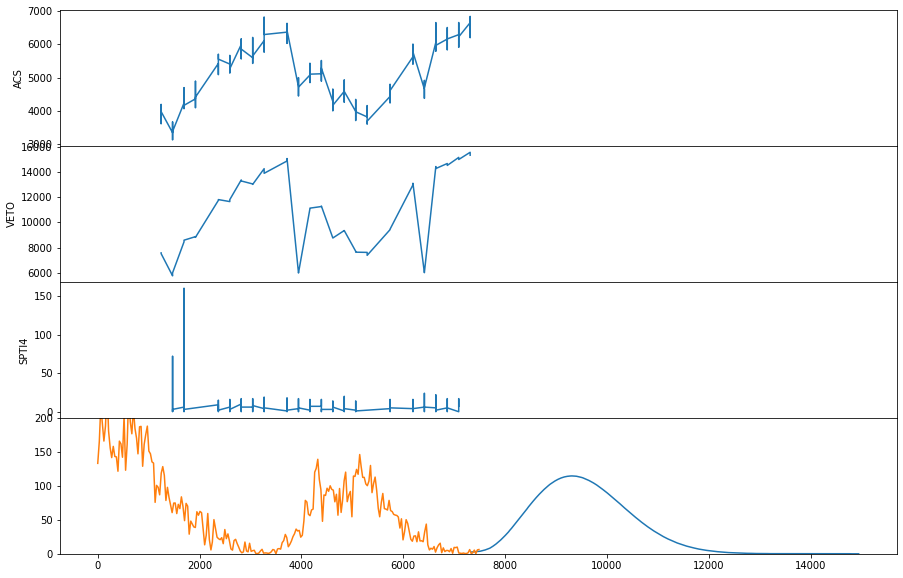

In [83]:
import matplotlib.pylab as plt

f, axes = plt.subplots(
    len(Ds)+1,
    figsize=(15,10),
    sharex=True,
)

plt.subplots_adjust(hspace=0)

for ax, (k, D) in zip(axes[:-1], Ds.items()):
    #D.reset_index(inplace=True)
    nots = D.c.str.contains('not')
    m=nots.isna() 

    ax.plot(
        D.ijd[m], 
        D.c[m],
    )
    
    ax.set_ylabel(k)
    
    plt.ylim([
        np.percentile(D.c[m],1),
        np.percentile(D.c[m],99)
    ])
    
axes[-1].plot(
    solar_pred_d.ijd,
    solar_pred_d.ssn,
    label="predicted"
)

axes[-1].plot(
    solar_obs_d.ijd,
    solar_obs_d.ssn,
    label="observed"
)


axes[-1].set_ylim([0,200])

In [59]:
solar_obs = requests.get("https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json").json()
solar_pred = requests.get("https://services.swpc.noaa.gov/json/solar-cycle/predicted-solar-cycle.json").json()

In [76]:
def solar_d(l):
    return pd.DataFrame([
        dict(
            ijd=Time(e['time-tag']+"-01 00:00:00").mjd - 51544,
            ssn=e.get('ssn', e.get('predicted_ssn')),
        )
            for e in l if e['time-tag'].startswith("20")
    ])
    
solar_obs_d = solar_d(solar_obs)
solar_pred_d = solar_d(solar_pred)

,ijd,ssn
0,7336.0,2.6
1,7365.0,2.7
2,7396.0,2.9
3,7426.0,3.2
4,7457.0,3.5
...,...,...
246,14823.0,0.0
247,14854.0,0.0
248,14884.0,0.0
249,14915.0,0.0
